In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [2]:
#load the data
df = pd.read_csv("/Users/kirankumar/Desktop/iternship/wek-3/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [4]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


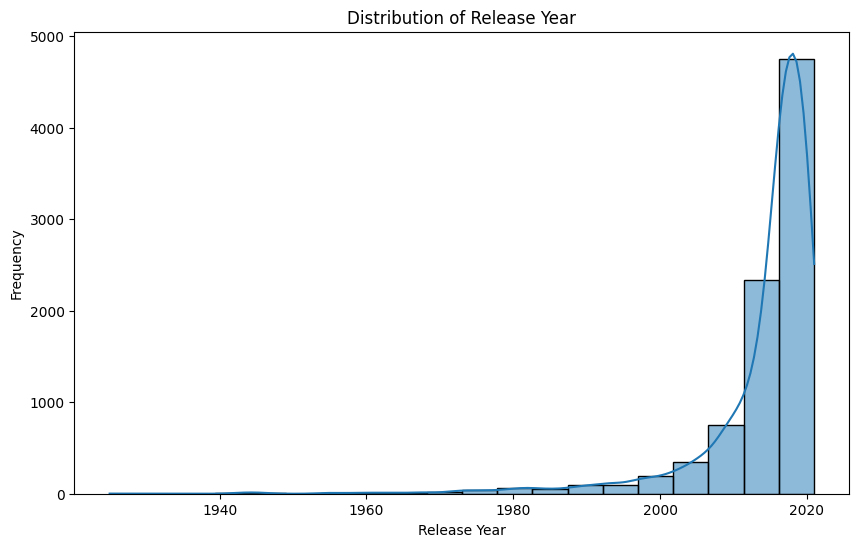

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=20, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


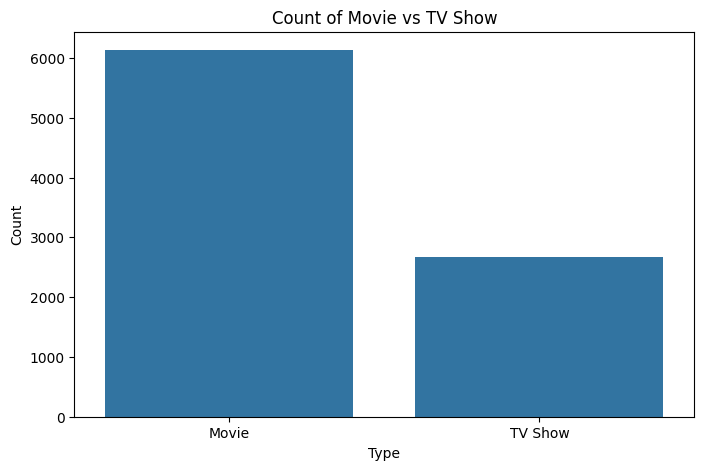

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df)
plt.title('Count of Movie vs TV Show')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


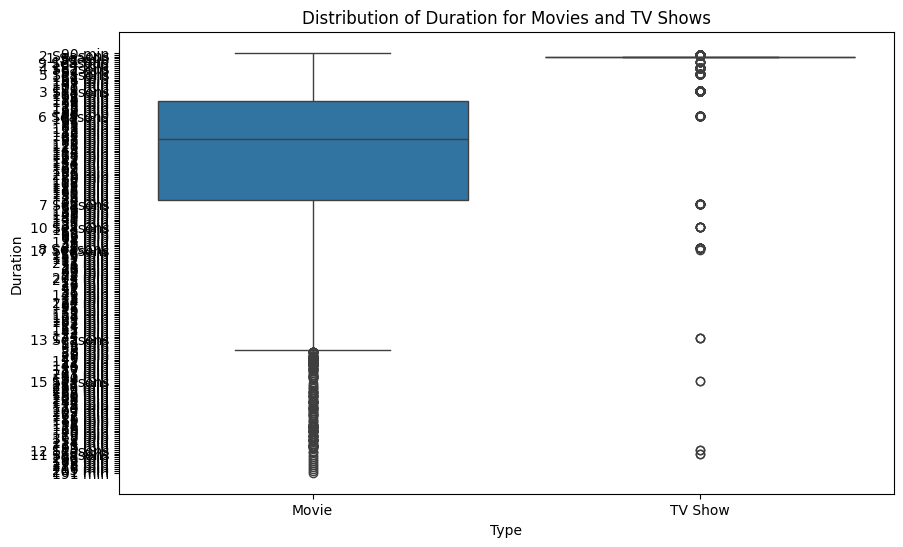

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration', data=df)
plt.title('Distribution of Duration for Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Duration')
plt.show()


In [8]:
rating_counts = df['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=rating_counts.index, values=rating_counts.values)])
fig.update_layout(title='Distribution of Ratings')
fig.show()


In [9]:
#check the columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
#Checking the data shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


<Axes: >

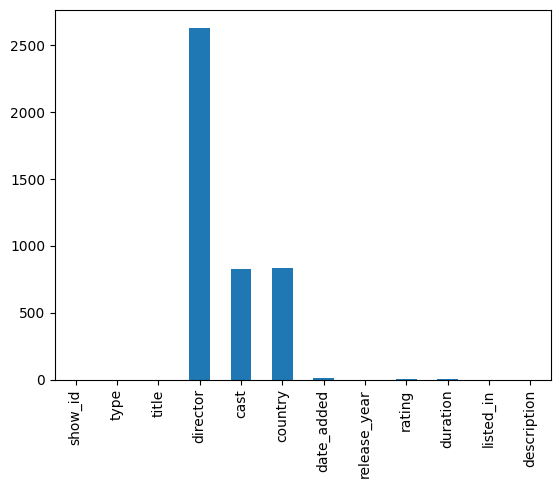

In [12]:
df.isnull().sum().plot(kind='bar')

In [13]:
# Remove missing values from the DataFrame
netflix=df.dropna()

# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


In [14]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


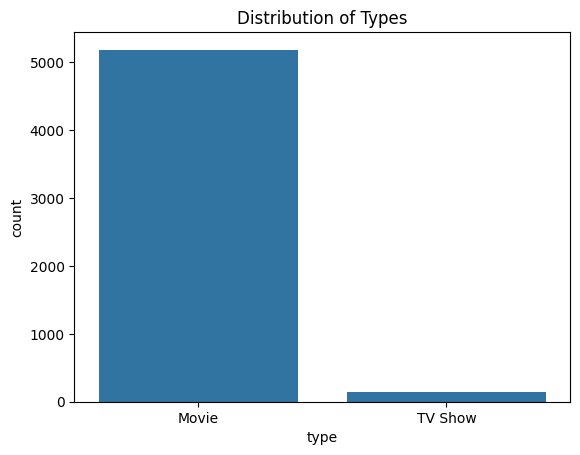

In [15]:
# Create a count plot for the 'type' column
sns.countplot(data=netflix, x='type')

# Set the title of the plot
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [16]:
print(netflix.head())


   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdo

In [17]:
print(netflix.shape)


(5332, 12)


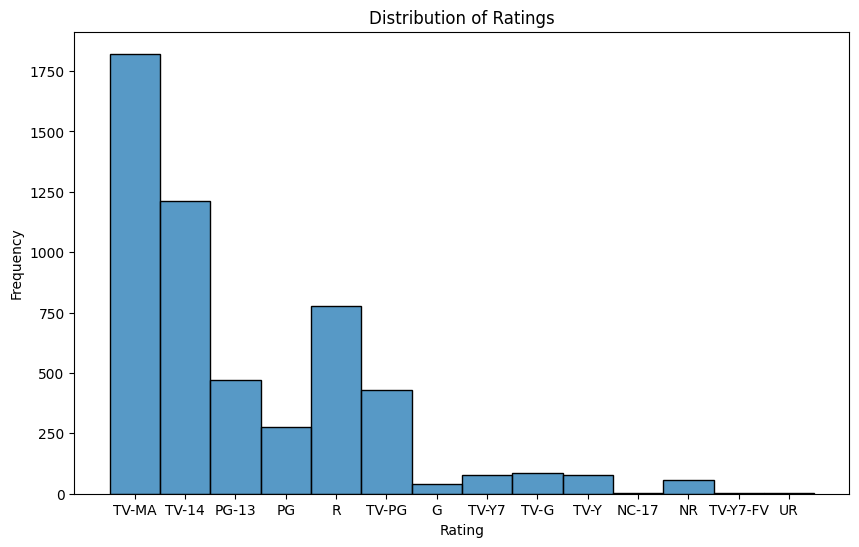

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix['rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


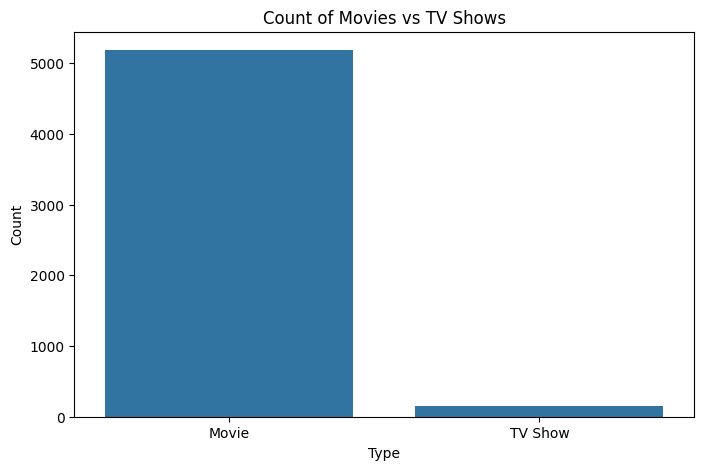

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=netflix)
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


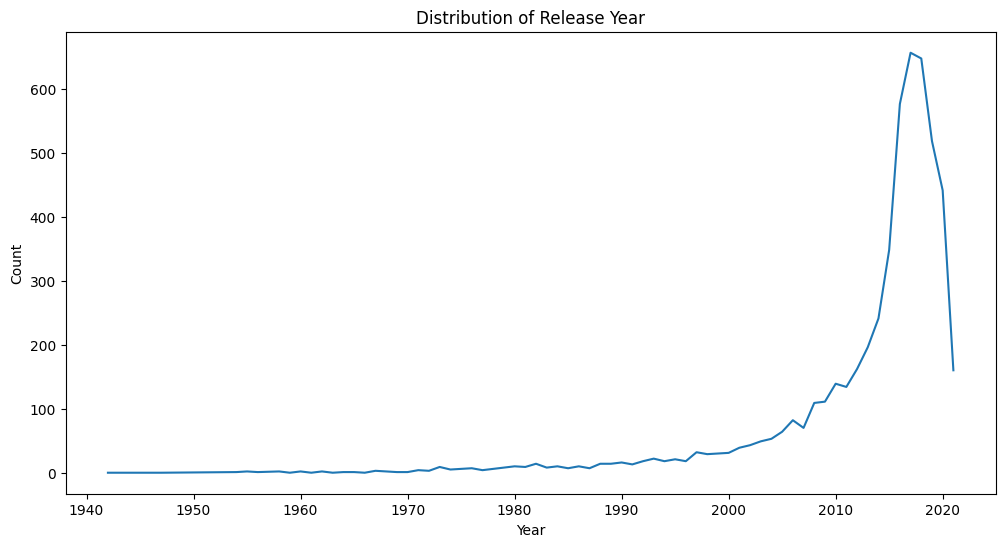

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=netflix['release_year'].value_counts().reset_index())
plt.title('Distribution of Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


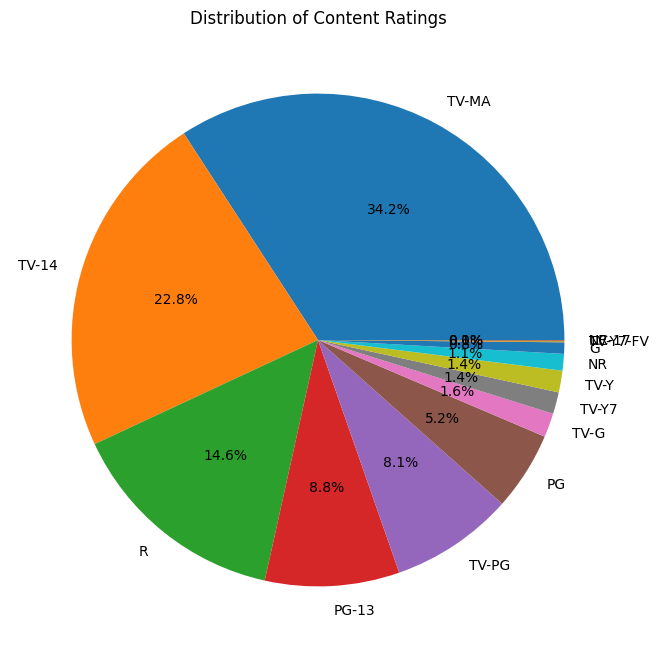

In [22]:
plt.figure(figsize=(8, 8))
netflix['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Content Ratings')
plt.ylabel('')
plt.show()


In [26]:
# Select rows where 'type' is 'Movie'
movie = netflix[netflix['type'] == 'Movie']

In [27]:
# Remove 'min' suffix from values in the 'duration' column and convert to integers
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

In [28]:
# check data types of movie duration
print(movie['duration'].dtype)

int64


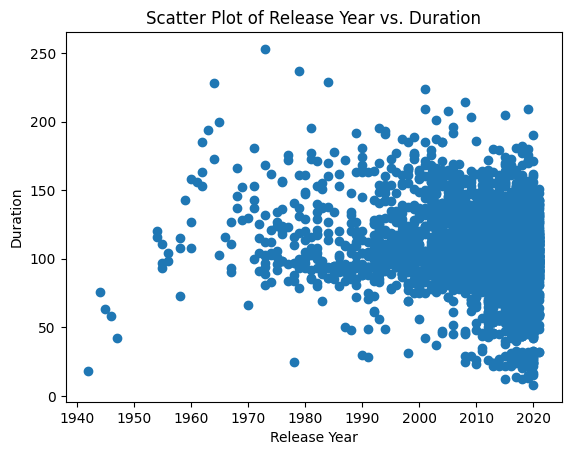

In [29]:
# Create a scatter plot of 'release_year' versus 'duration'
plt.scatter(movie['release_year'], movie['duration'])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Release Year vs. Duration')

# Display the plot
plt.show()

In [30]:
# Find the index of the row with the minimum duration
min_duration_index = movie['duration'].idxmin()

# Get the corresponding release year and duration
corresponding_min_release_year = movie.loc[min_duration_index, 'release_year']
min_duration = movie.loc[min_duration_index, 'duration']

print(f"The movie with the minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")

# Find the index of the row with the maximum duration
max_duration_index = movie['duration'].idxmax()

# Get the corresponding release year and duration
corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']
max_duration = movie.loc[max_duration_index, 'duration']

print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie with the minimum duration of 8 minutes was released in the year 2020.
The movie with the maximum duration of 253 minutes was released in the year 1973.


In [31]:
# Count the occurrences of each unique entry in the 'listed_in' column
genre_counts = movie['listed_in'].value_counts()

# Display the genre counts
print("Genre Counts:")
print(genre_counts)

Genre Counts:
listed_in
Dramas, International Movies                                        336
Stand-Up Comedy                                                     286
Comedies, Dramas, International Movies                              257
Dramas, Independent Movies, International Movies                    243
Children & Family Movies, Comedies                                  179
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
LGBTQ Movies, Thrillers                                               1
Sci-Fi & Fantasy                                                      1
Children & Family Movies, Comedies, Cult Movies                       1
Cult Movies, Dramas, Thrillers                                        1
Name: count, Length: 268, dtype: int64


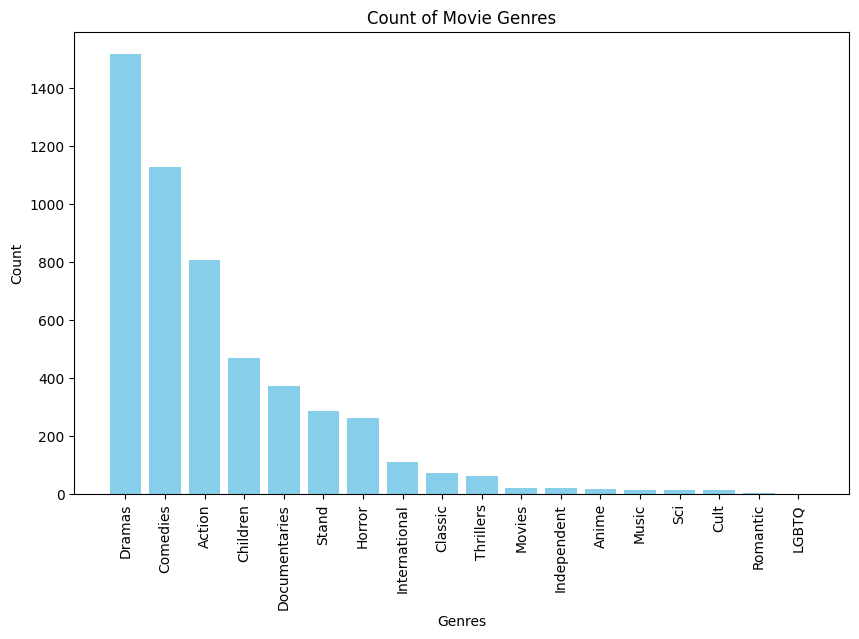

In [32]:
# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

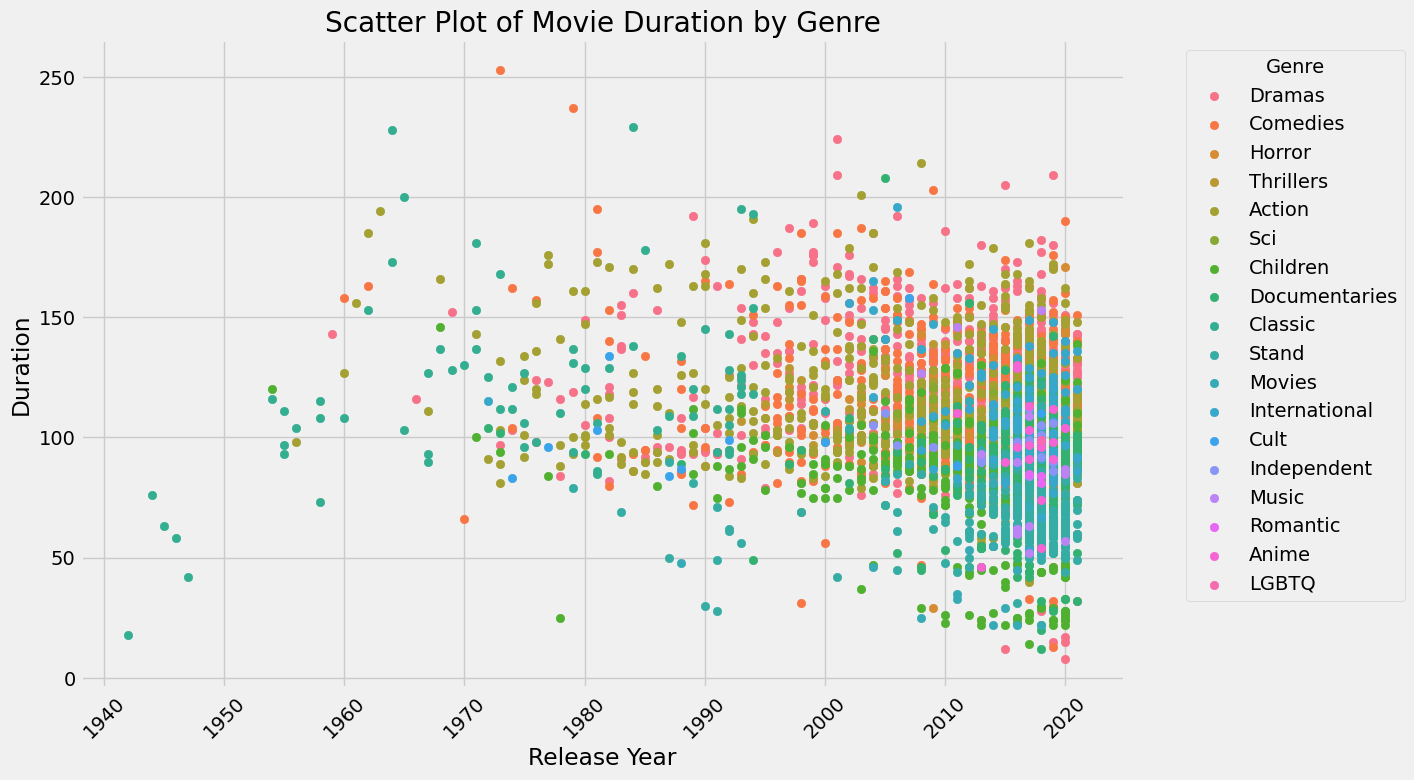

In [38]:
# Apply the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Create a color palette for each unique genre
palette = sns.color_palette("husl", len(movie['genres'].unique()))

# Create scatter plot with different colors for each genre
plt.figure(figsize=(12, 8))  # Increase the figure size here
for i, genre in enumerate(movie['genres'].unique()):
    plt.scatter(movie['release_year'][movie['genres'] == genre], 
                movie['duration'][movie['genres'] == genre], 
                label=genre, 
                color=palette[i])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Movie Duration by Genre')
plt.xticks(rotation=45)

# Position the legend outside the plot area
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [39]:
# Change the x data to movie['duration']
trace = go.Histogram(
    x=movie['duration'],  # Use movie duration for x-axis
    xbins=dict(size=0.5),
    marker=dict(color='rgb(26, 118, 255)')
)

layout = go.Layout(
    template="plotly_dark",  # Dark theme layout
    title='Distribution of Movie Durations',  # Title of the plot
    xaxis=dict(title='Duration (Minutes)')  # X-axis label
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [40]:
movie['rating'].value_counts()

rating
TV-MA       1741
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

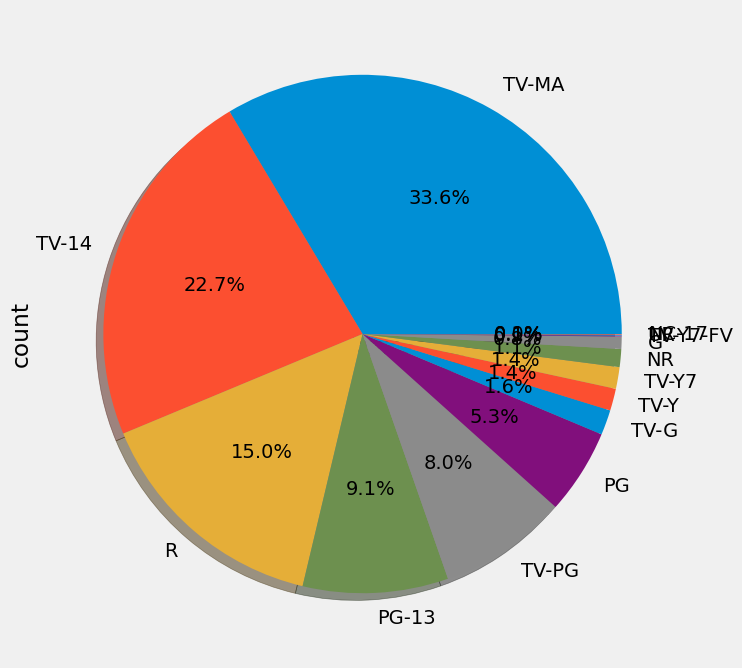

In [41]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Add percentage labels to each wedge
    shadow=True,  # Add shadow effect to the pie chart
    figsize=(10, 8)  # Set the size of the figure
)

# Display the pie chart
plt.show()

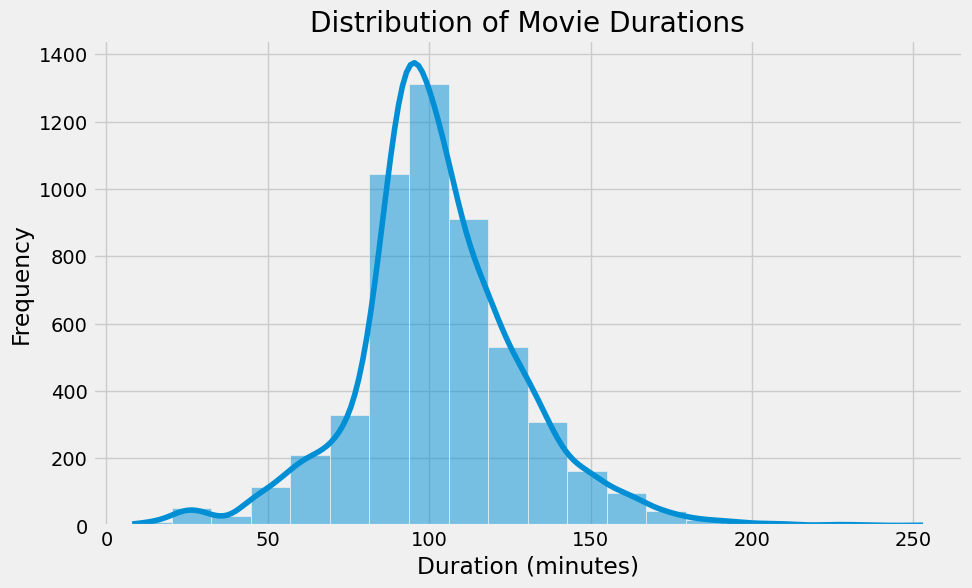

In [42]:
# Plot a histogram for movie durations
plt.figure(figsize=(10, 6))
sns.histplot(movie['duration'], bins=20, kde=True)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.show()


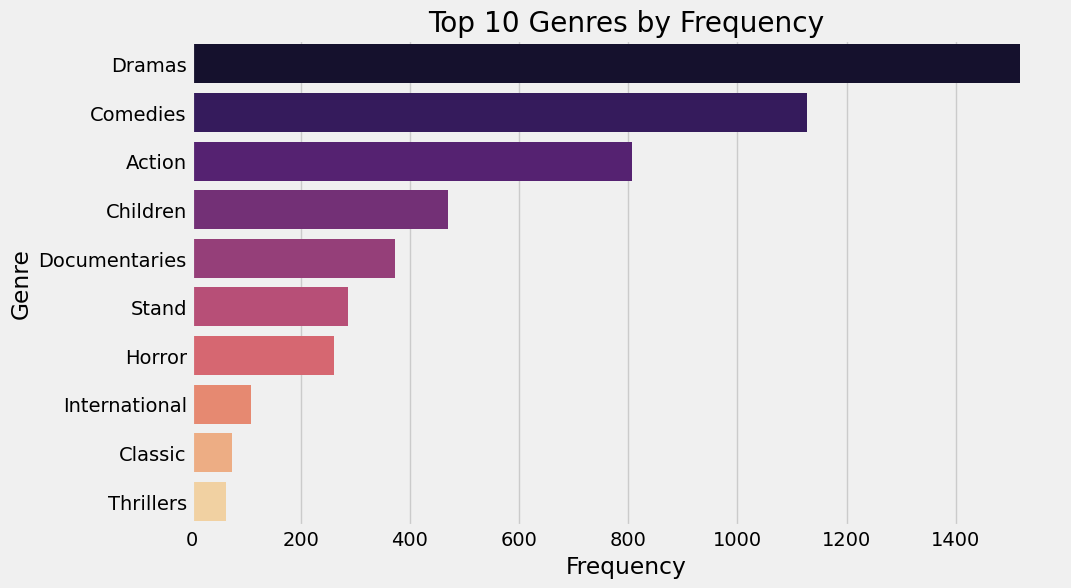

In [45]:
# Extracting and counting genres
genres = movie['genres'].str.split(',', expand=True).stack().value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=genres.values, y=genres.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Frequency')
plt.show()
